In [16]:
import numpy as np
import pandas as pd
import torch
import math
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM, NHITS, RNN, MLP, Informer, FEDformer,StemGNN,NBEATSx
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA,MSTL
from ray.tune.search.hyperopt import HyperOptSearch
from neuralforecast.losses.pytorch import MAE
from neuralforecast.auto import AutoNHITS
import matplotlib.pyplot as plt
from neuralforecast.losses.pytorch import HuberLoss
from ray import tune
from datetime import datetime
from datetime import date, timedelta

from ray import tune

from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoNHITS, AutoLSTM
from neuralforecast.losses.pytorch import MQLoss


In [4]:
delta = pd.read_csv('data/DAL_data.csv')
oil = pd.read_csv('data/CLF_data.csv')


In [5]:
delta.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-24,33.110001,33.529999,32.520000,33.320000,29.590050,11289700
1,2014-03-25,33.459999,34.509998,33.459999,34.430000,30.575798,11544300
2,2014-03-26,34.500000,34.549999,33.910000,33.959999,30.158407,12058800
3,2014-03-27,33.900002,34.290001,32.970001,34.130001,30.309376,11952200
4,2014-03-28,34.139999,34.689999,33.509998,33.529999,29.776543,10434900


## turn the data into format

In [12]:
df = delta[['Date', 'Adj Close']]
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Date': 'ds', 'Adj Close': 'y'})
df['unique_id'] = 0

In [13]:
df

,ds,y,unique_id
0,2014-03-24,29.590050,0
1,2014-03-25,30.575798,0
2,2014-03-26,30.158407,0
3,2014-03-27,30.309376,0
4,2014-03-28,29.776543,0
...,...,...,...
2513,2024-03-18,43.439999,0
2514,2024-03-19,43.740002,0
2515,2024-03-20,45.380001,0
2516,2024-03-21,46.000000,0


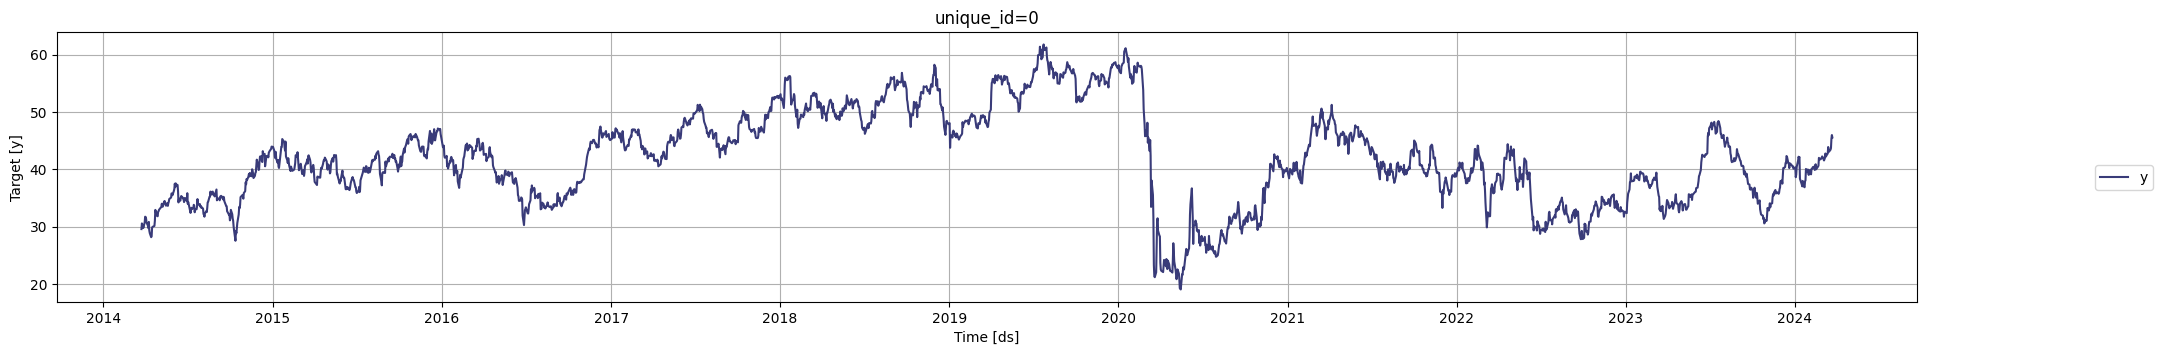

In [15]:
StatsForecast.plot(df, engine='matplotlib')

## create NeuralForecast class, train

In [18]:
# num_samples recommended above 20
nf = NeuralForecast(
    models=[
        AutoNHITS(h=7, loss=MQLoss(), num_samples=5),
        AutoLSTM(h=7, loss=MQLoss(), num_samples=2),
    ],
    freq='D'
)


In [19]:
nf.fit(df=df)


(_train_tune pid=69784) Seed set to 16


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 14.50it/s, v_num=0, train_loss_step=0.237, train_loss_epoch=0.366]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=69784) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 12.88it/s, v_num=0, train_loss_step=0.0616, train_loss_epoch=0.0637, valid_loss=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=69784) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  7.63it/s, v_num=0, train_loss_step=0.0678, train_loss_epoch=0.056, valid_loss=0.336]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=69784) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 12.56it/s, v_num=0, train_loss_step=0.0748, train_loss_epoch=0.0525, valid_loss=0.324]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 

(_train_tune pid=69784) /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/resource_tracker.py:224: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
(_train_tune pid=69784)   warnings.warn('resource_tracker: There appear to be %d '
(_train_tune pid=70199) Seed set to 15


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 73.90it/s, v_num=0, train_loss_step=0.251, train_loss_epoch=0.272]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=70199) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 73.18it/s, v_num=0, train_loss_step=0.392, train_loss_epoch=0.330, valid_loss=1.170]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=70199) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 80.24it/s, v_num=0, train_loss_step=0.190, train_loss_epoch=0.129, valid_loss=3.860]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=70199) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 68.38it/s, v_num=0, train_loss_step=0.0898, train_loss_epoch=0.241, valid_loss=1.780]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 

2024-03-30 02:15:36,349	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-03-30 02:15:36,352	INFO tune.py:1016 -- Wrote the latest version of all result files and experiment state to '/Users/ryderkemper/ray_results/_train_tune_2024-03-30_02-14-20' in 0.0076s.
Seed set to 16


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 64.91it/s, v_num=0, train_loss_step=0.121, train_loss_epoch=0.116, valid_loss=1.400]  
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=70199) 
Epoch 999: 100%|██████████| 1/1 [00:00<00:00,  7.24it/s, v_num=0, train_loss_step=0.121, train_loss_epoch=0.121, valid_loss=1.830]
                                                                                

(_train_tune pid=70199) /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/resource_tracker.py:224: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
(_train_tune pid=70199)   warnings.warn('resource_tracker: There appear to be %d '


Epoch 99: 100%|█| 1/1 [00:00<00:00, 11.51it/s, v_num=12, train_loss_step=0.237, 
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|████████████████████| 1/1 [00:00<00:00,  8.44it/s]
Epoch 199: 100%|█| 1/1 [00:00<00:00, 12.61it/s, v_num=12, train_loss_step=0.0616
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|████████████████████| 1/1 [00:00<00:00,  7.74it/s]
Epoch 299: 100%|█| 1/1 [00:00<00:00, 12.58it/s, v_num=12, train_loss_step=0.0678
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|████████████████████| 1/1 [00:00<00:00,  8.17it/s]
Epoch 399: 100%|█| 1/1 [00:00<00:00, 12.44it/s, v_num=12, train_loss_step=0.0748
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|████████████████████| 1/1 [00:00<00:00,  8.13it/s]
Epoch 499: 100%|█| 1/1 [00:0

## predict future

In [20]:
fcst_df = nf.predict()
fcst_df.columns = fcst_df.columns.str.replace('-median', '')
fcst_df.head()

Predicting DataLoader 0: 100%|████████████████████| 1/1 [00:00<00:00,  8.33it/s]


,ds,AutoNHITS,AutoNHITS-lo-90,AutoNHITS-lo-80,AutoNHITS-hi-80,AutoNHITS-hi-90,AutoLSTM,AutoLSTM-lo-90,AutoLSTM-lo-80,AutoLSTM-hi-80,AutoLSTM-hi-90
unique_id,,,,,,,,,,,
0,2024-03-23,45.539818,44.272255,44.661030,46.494942,46.600399,45.812302,43.971848,44.411861,47.302746,47.687637
0,2024-03-24,45.322418,43.460072,44.020382,46.413994,46.650398,45.828529,43.641674,44.257362,47.656860,48.043777
0,2024-03-25,45.169468,43.147987,43.538532,46.350853,46.594780,45.774681,43.144924,43.880508,47.839043,48.348446
0,2024-03-26,44.882336,42.664383,43.142445,46.308609,46.502342,45.714813,42.614944,43.417000,47.970955,48.517040
0,2024-03-27,44.666935,42.452122,42.789707,46.364201,46.732883,45.748234,42.396614,43.131958,48.255714,48.724136


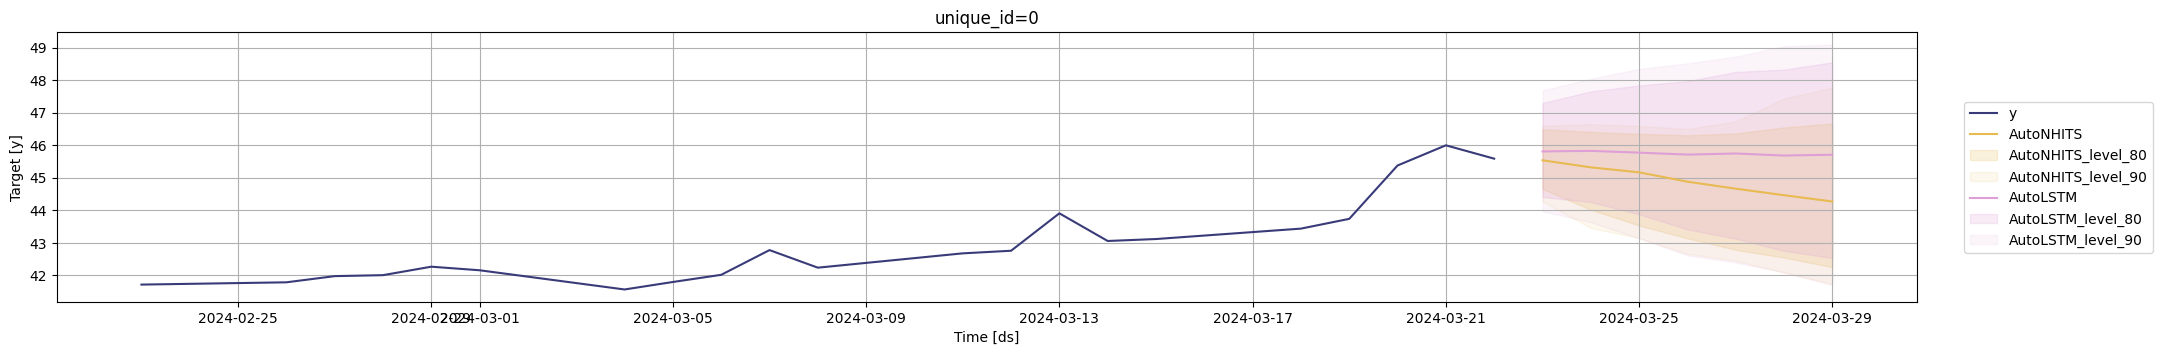

In [22]:
StatsForecast.plot(df, fcst_df, engine='matplotlib', max_insample_length=7 * 3, level=[80, 90])


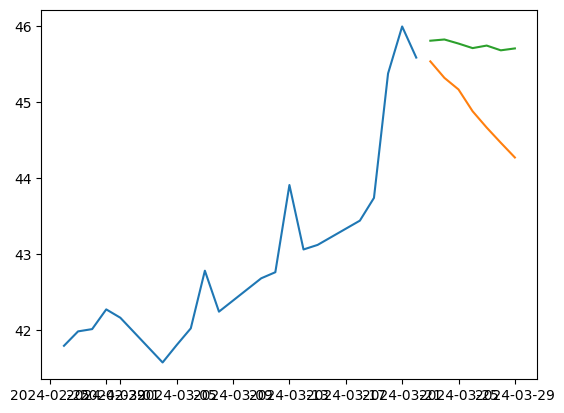

In [38]:
plt.plot(df['ds'].iloc[-20:], df['y'].iloc[-20:])
plt.plot(fcst_df['ds'], fcst_df['AutoNHITS'])
plt.plot(fcst_df['ds'], fcst_df['AutoLSTM'])
plt.show()

## cross validation

In [23]:
cv_df = nf.cross_validation(df, n_windows=2)


(_train_tune pid=76701) Seed set to 7


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 20.17it/s, v_num=0, train_loss_step=0.144, train_loss_epoch=0.161]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=76701) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 22.71it/s, v_num=0, train_loss_step=0.358, train_loss_epoch=0.533, valid_loss=0.553]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 24.87it/s, v_num=0, train_loss_step=0.139, train_loss_epoch=0.160, valid_loss=1.270]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 15.43it/s]
(_train_tune pid=76701) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 16.70it/s, v_num=0, train_loss_step=0.090, train_loss_epoch=0.136, valid_loss=0.531]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=76701) 
Epoch 499: 100%|██████████| 1/1 [00:00<

(_train_tune pid=76701) /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/resource_tracker.py:224: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
(_train_tune pid=76701)   warnings.warn('resource_tracker: There appear to be %d '
(_train_tune pid=77191) Seed set to 9


Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s, v_num=0, train_loss_step=0.266, train_loss_epoch=0.266]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=77191) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s, v_num=0, train_loss_step=0.0756, train_loss_epoch=0.0705, valid_loss=0.801]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=77191) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s, v_num=0, train_loss_step=0.0573, train_loss_epoch=0.0575, valid_loss=0.224]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=77191) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s, v_num=0, train_loss_step=0.057, train_loss_epoch=0.0572, valid_loss=0.175] 
Validation: |          | 0/? [00:00<

2024-03-30 02:37:20,274	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-03-30 02:37:20,280	INFO tune.py:1016 -- Wrote the latest version of all result files and experiment state to '/Users/ryderkemper/ray_results/_train_tune_2024-03-30_02-28-16' in 0.0155s.
Seed set to 9
(_train_tune pid=77191) /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/resource_tracker.py:224: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects

(_train_tune pid=77191) 
Epoch 499: 100%|██████████| 1/1 [00:01<00:00,  0.95it/s, v_num=0, train_loss_step=0.0522, train_loss_epoch=0.0522, valid_loss=0.214]
Epoch 99: 100%|█| 1/1 [00:01<00:00,  0.81it/s, v_num=17, train_loss_step=0.266, 
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|████████████████████| 1/1 [00:00<00:00,  2.77it/s]
Epoch 199: 100%|█| 1/1 [00:00<00:00,  1.24it/s, v_num=17, train_loss_step=0.0756
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|████████████████████| 1/1 [00:00<00:00,  3.78it/s]
Epoch 299: 100%|█| 1/1 [00:00<00:00,  2.48it/s, v_num=17, train_loss_step=0.0573
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|████████████████████| 1/1 [00:00<00:00,  6.71it/s]
Epoch 399: 100%|█| 1/1 [00:00<00:00,  1.86it/s, v_num=17, train_loss_step=0.057,
Validation: |                   

In [41]:
cv_df

,ds,cutoff,AutoNHITS-median,AutoNHITS-lo-90,AutoNHITS-lo-80,AutoNHITS-hi-80,AutoNHITS-hi-90,AutoLSTM-median,AutoLSTM-lo-90,AutoLSTM-lo-80,AutoLSTM-hi-80,AutoLSTM-hi-90,y
unique_id,,,,,,,,,,,,,
0,2024-03-13,2024-03-12,42.794975,41.554298,41.795925,43.661800,43.967937,42.525311,41.143162,41.466873,43.543938,43.929832,43.910000
0,2024-03-14,2024-03-12,42.869865,41.782017,41.953098,43.805801,44.115013,42.447132,40.568207,41.015190,43.914978,44.428608,43.060001
0,2024-03-15,2024-03-12,42.875340,41.717178,41.901634,43.950699,44.260548,42.356377,40.091152,40.568817,44.024590,44.583412,43.119999
0,2024-03-18,2024-03-12,42.885277,41.595913,41.817783,44.151608,44.617321,42.242474,39.628841,40.198097,44.224018,44.833023,43.439999
0,2024-03-19,2024-03-12,42.941235,41.186844,41.472507,44.236542,44.752842,42.156803,39.234447,39.923542,44.432632,45.058338,43.740002
0,2024-03-20,2024-03-12,42.916023,40.882263,41.322968,44.393990,44.995274,42.062916,38.889912,39.672565,44.612858,45.224209,45.380001
0,2024-03-21,2024-03-12,42.958344,40.646931,41.115540,44.627914,45.246162,42.105270,38.575935,39.352791,44.811443,45.452499,46.000000
0,2024-03-14,2024-03-13,43.940102,42.360310,42.728844,45.515648,46.093975,43.617847,42.249275,42.569973,44.587273,44.963196,43.060001
0,2024-03-15,2024-03-13,44.015778,42.590427,42.887672,45.661163,46.242599,43.557667,41.757122,42.188244,45.010014,45.492897,43.119999


In [30]:
for cutoff in cv_df['cutoff'].unique():
    StatsForecast.plot(
        df, 
        cv_df.query('cutoff == @cutoff').drop(columns=['y', 'cutoff']), 
        max_insample_length=7 * 4, 
        engine='matplotlib'
    )


In [33]:
new_cv = cv_df.copy()
new_cv.columns = new_cv.columns.str.replace('-median', '')

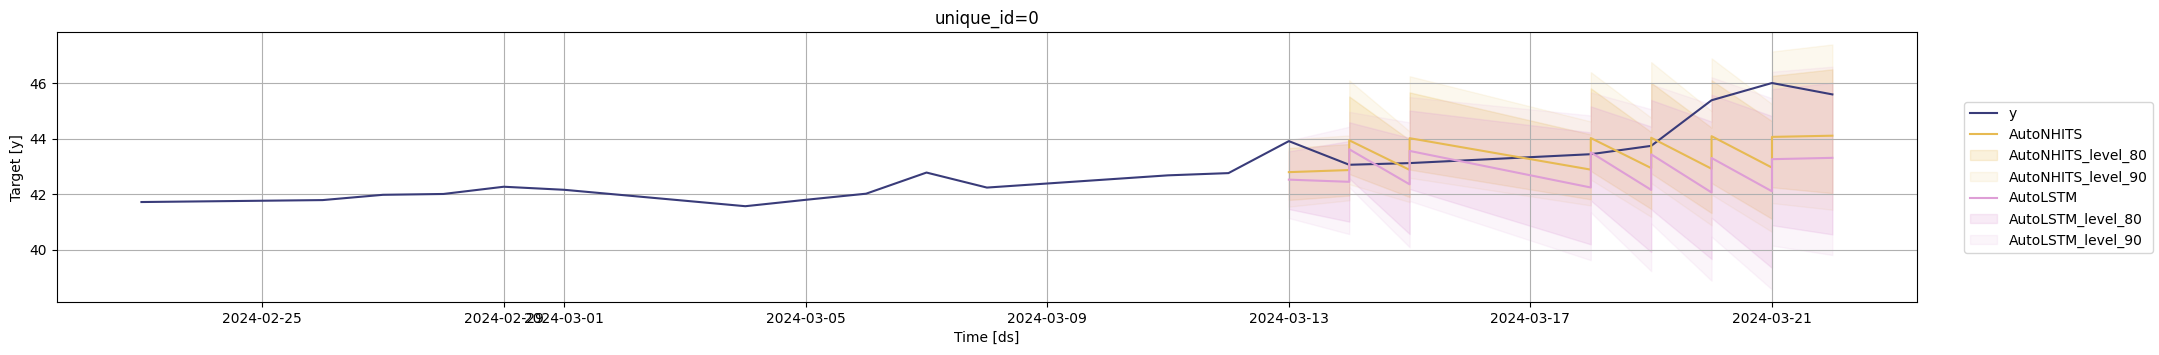

In [34]:
StatsForecast.plot(df, new_cv.drop(columns=['y', 'cutoff']), engine='matplotlib', max_insample_length=7 * 3, level=[80, 90])

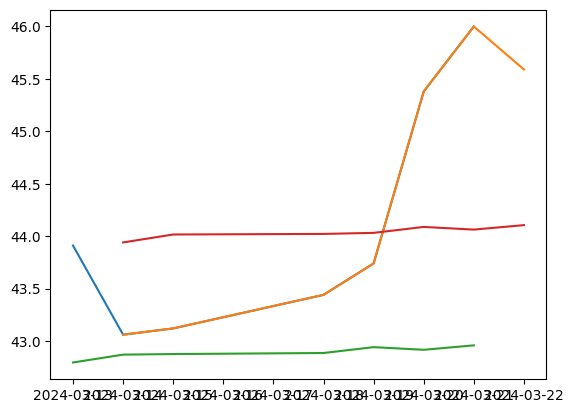

In [44]:
plt.plot(cv_df.iloc[:7]['ds'], cv_df.iloc[:7]['y'])
plt.plot(cv_df.iloc[7:]['ds'], cv_df.iloc[7:]['y'])
plt.plot(cv_df.iloc[:7]['ds'], cv_df.iloc[:7]['AutoNHITS-median'])
plt.plot(cv_df.iloc[7:]['ds'], cv_df.iloc[7:]['AutoNHITS-median'])